## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
#spam_data.head()
#spam_data.describe().T
spam_data.info()
#spam_data.ix[:,:10].head()
#len(spam_data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


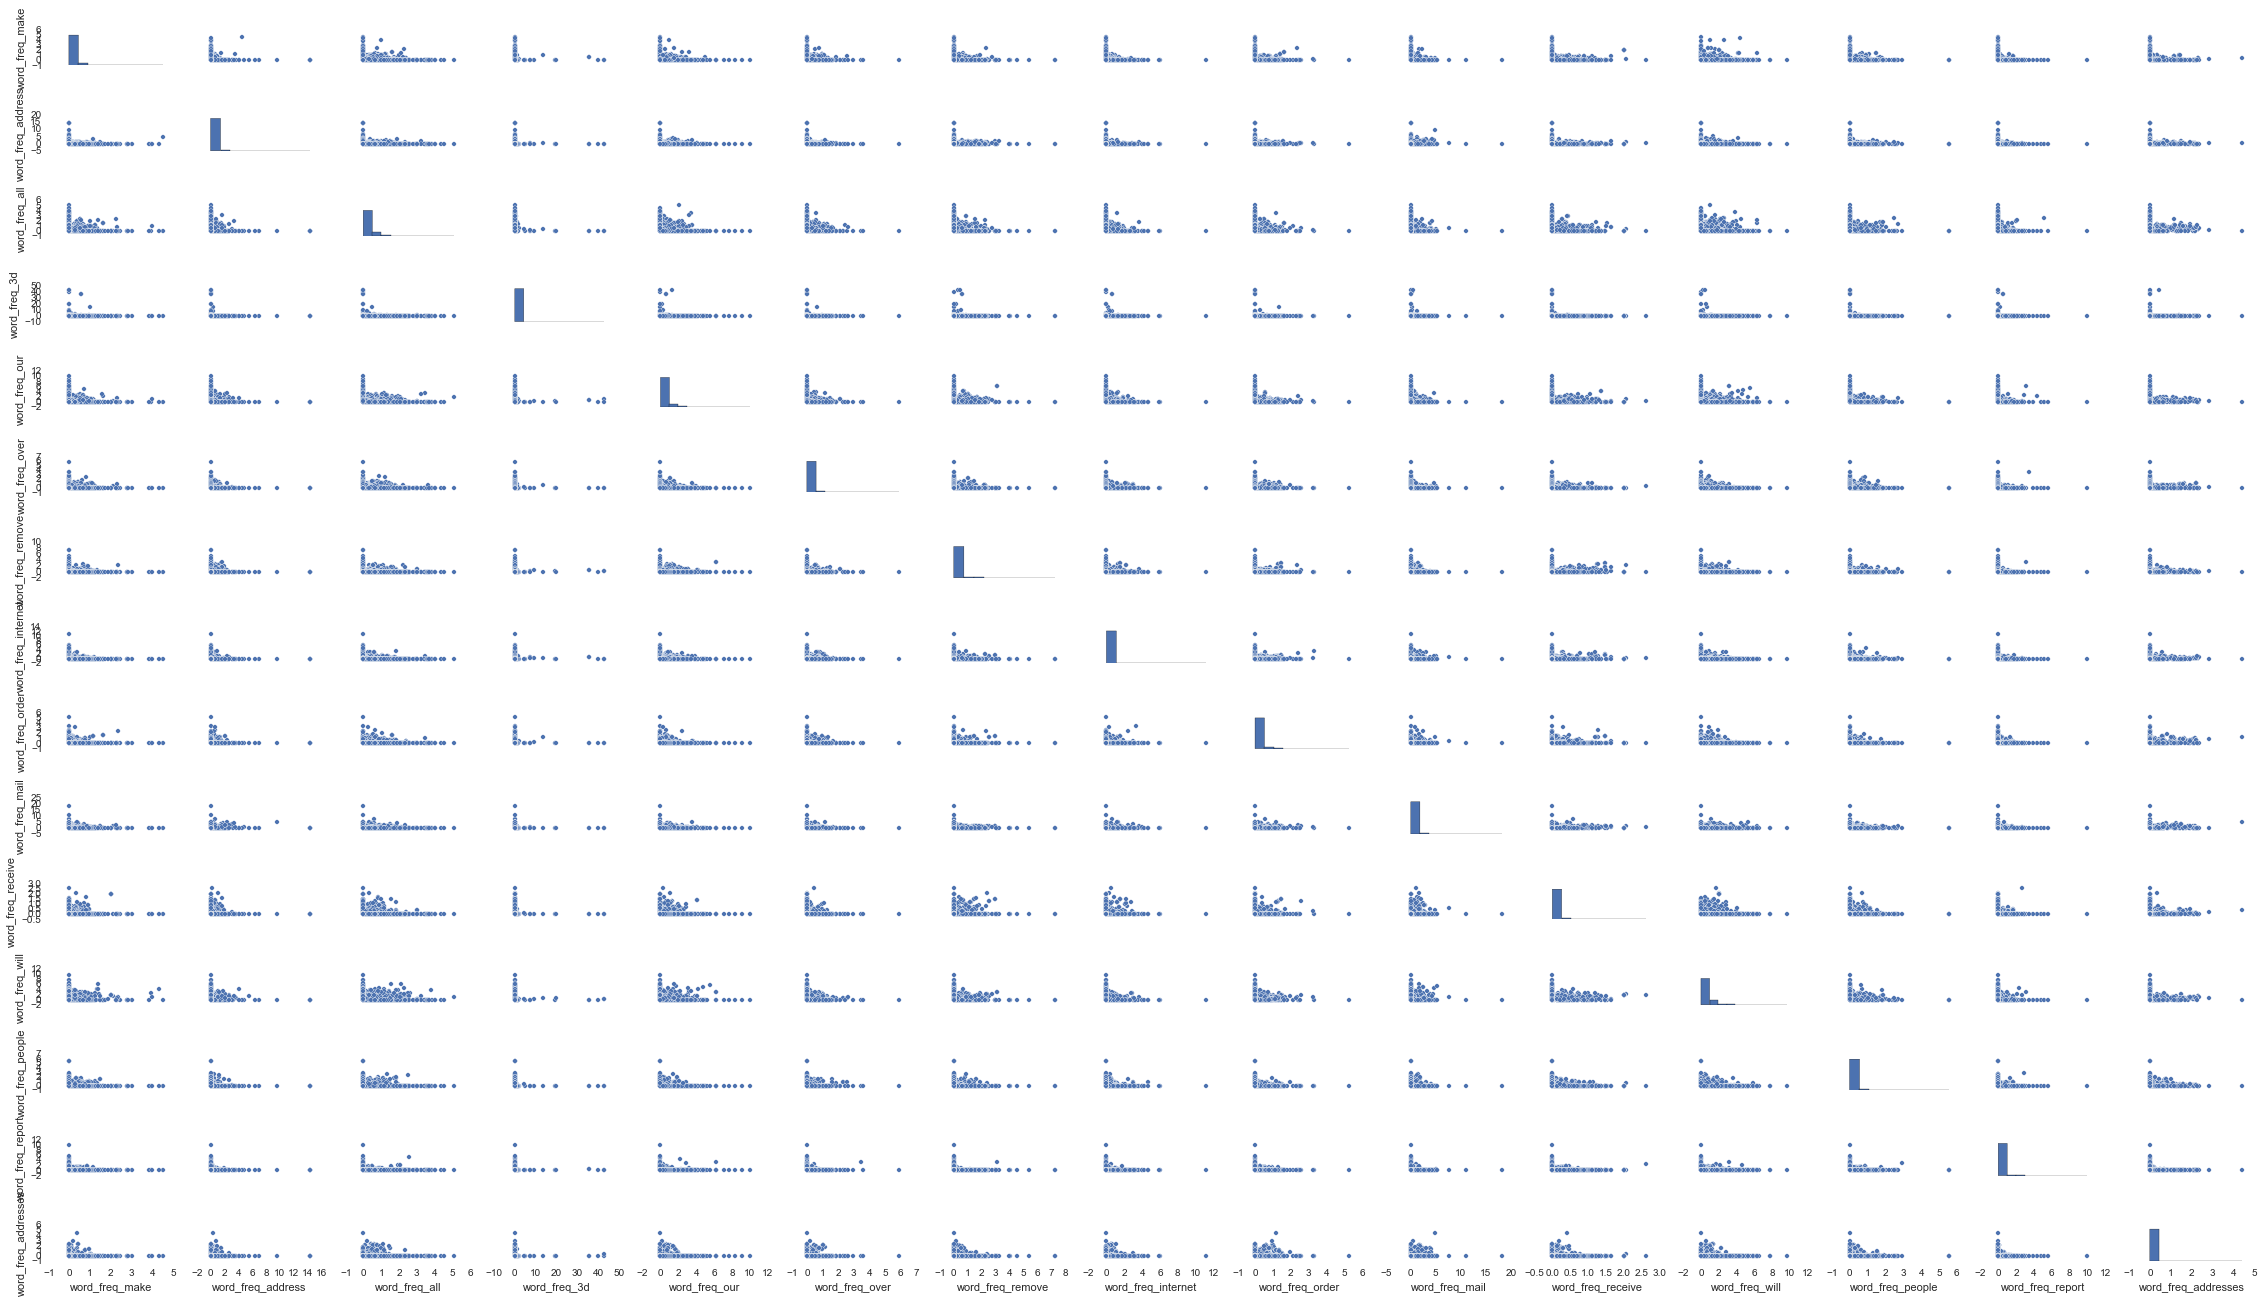

In [31]:
spam_data.columns = spam_data.columns.map(str.strip)
spam_data.columns
sns.pairplot(spam_data.ix[:,:15], size = 1.2, aspect=1.75)

Looking at the plots, there does not seem to be much of a Linear Relationship between variables 0 to 15.

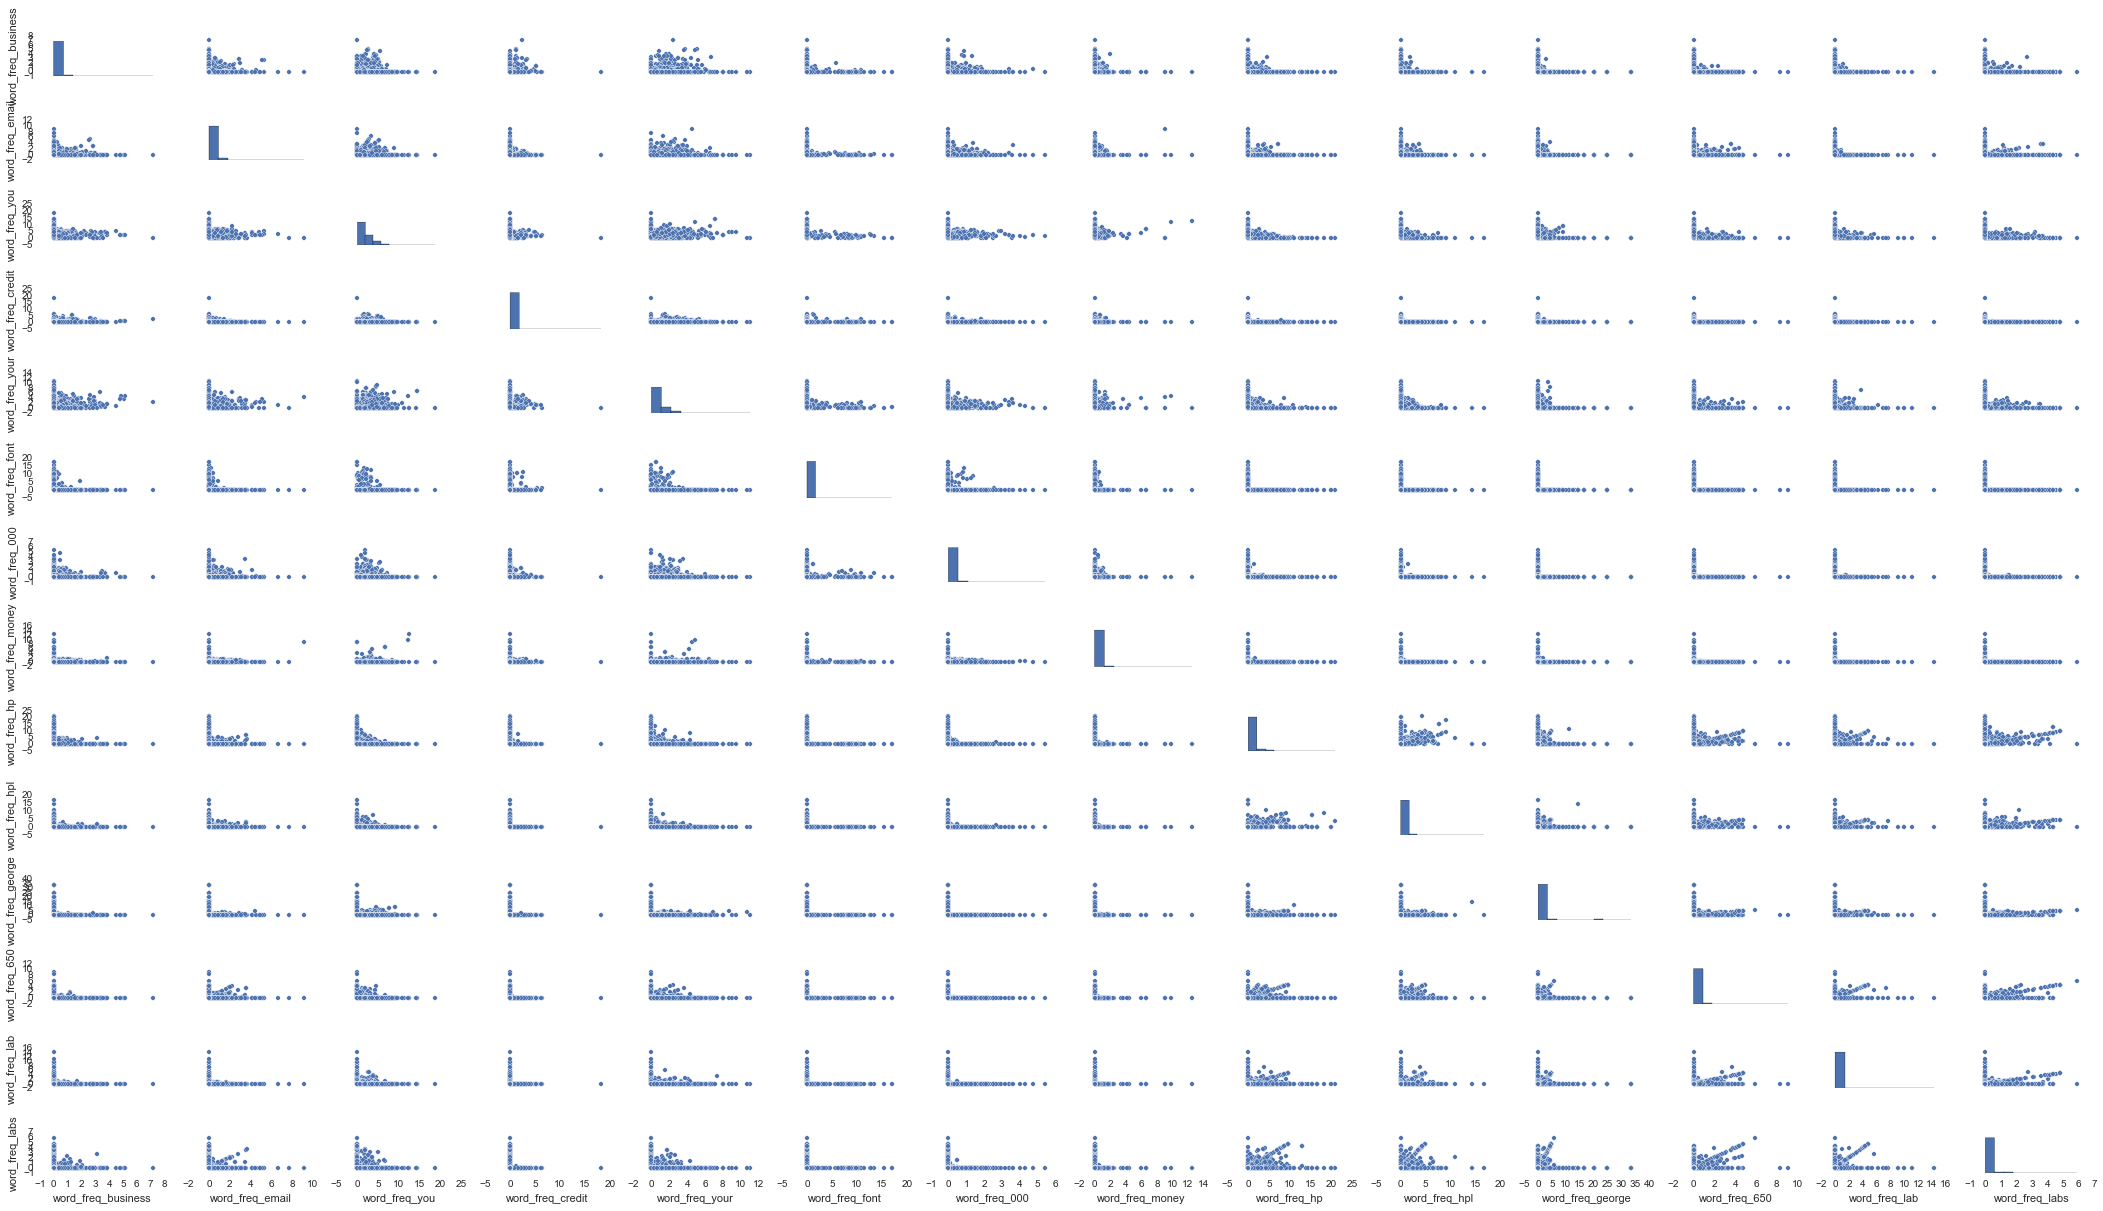

In [33]:
sns.pairplot(spam_data.ix[:,16:30], size = 1.2, aspect=1.75)

Likewise looking at the plots, there does not seem to be much of a Linear Relationship between variables 16 to 31. Althought attribute 'word_freq_labs' seems to show some sort of linearity with 'word_freq_650' and 'word_freq_lab'

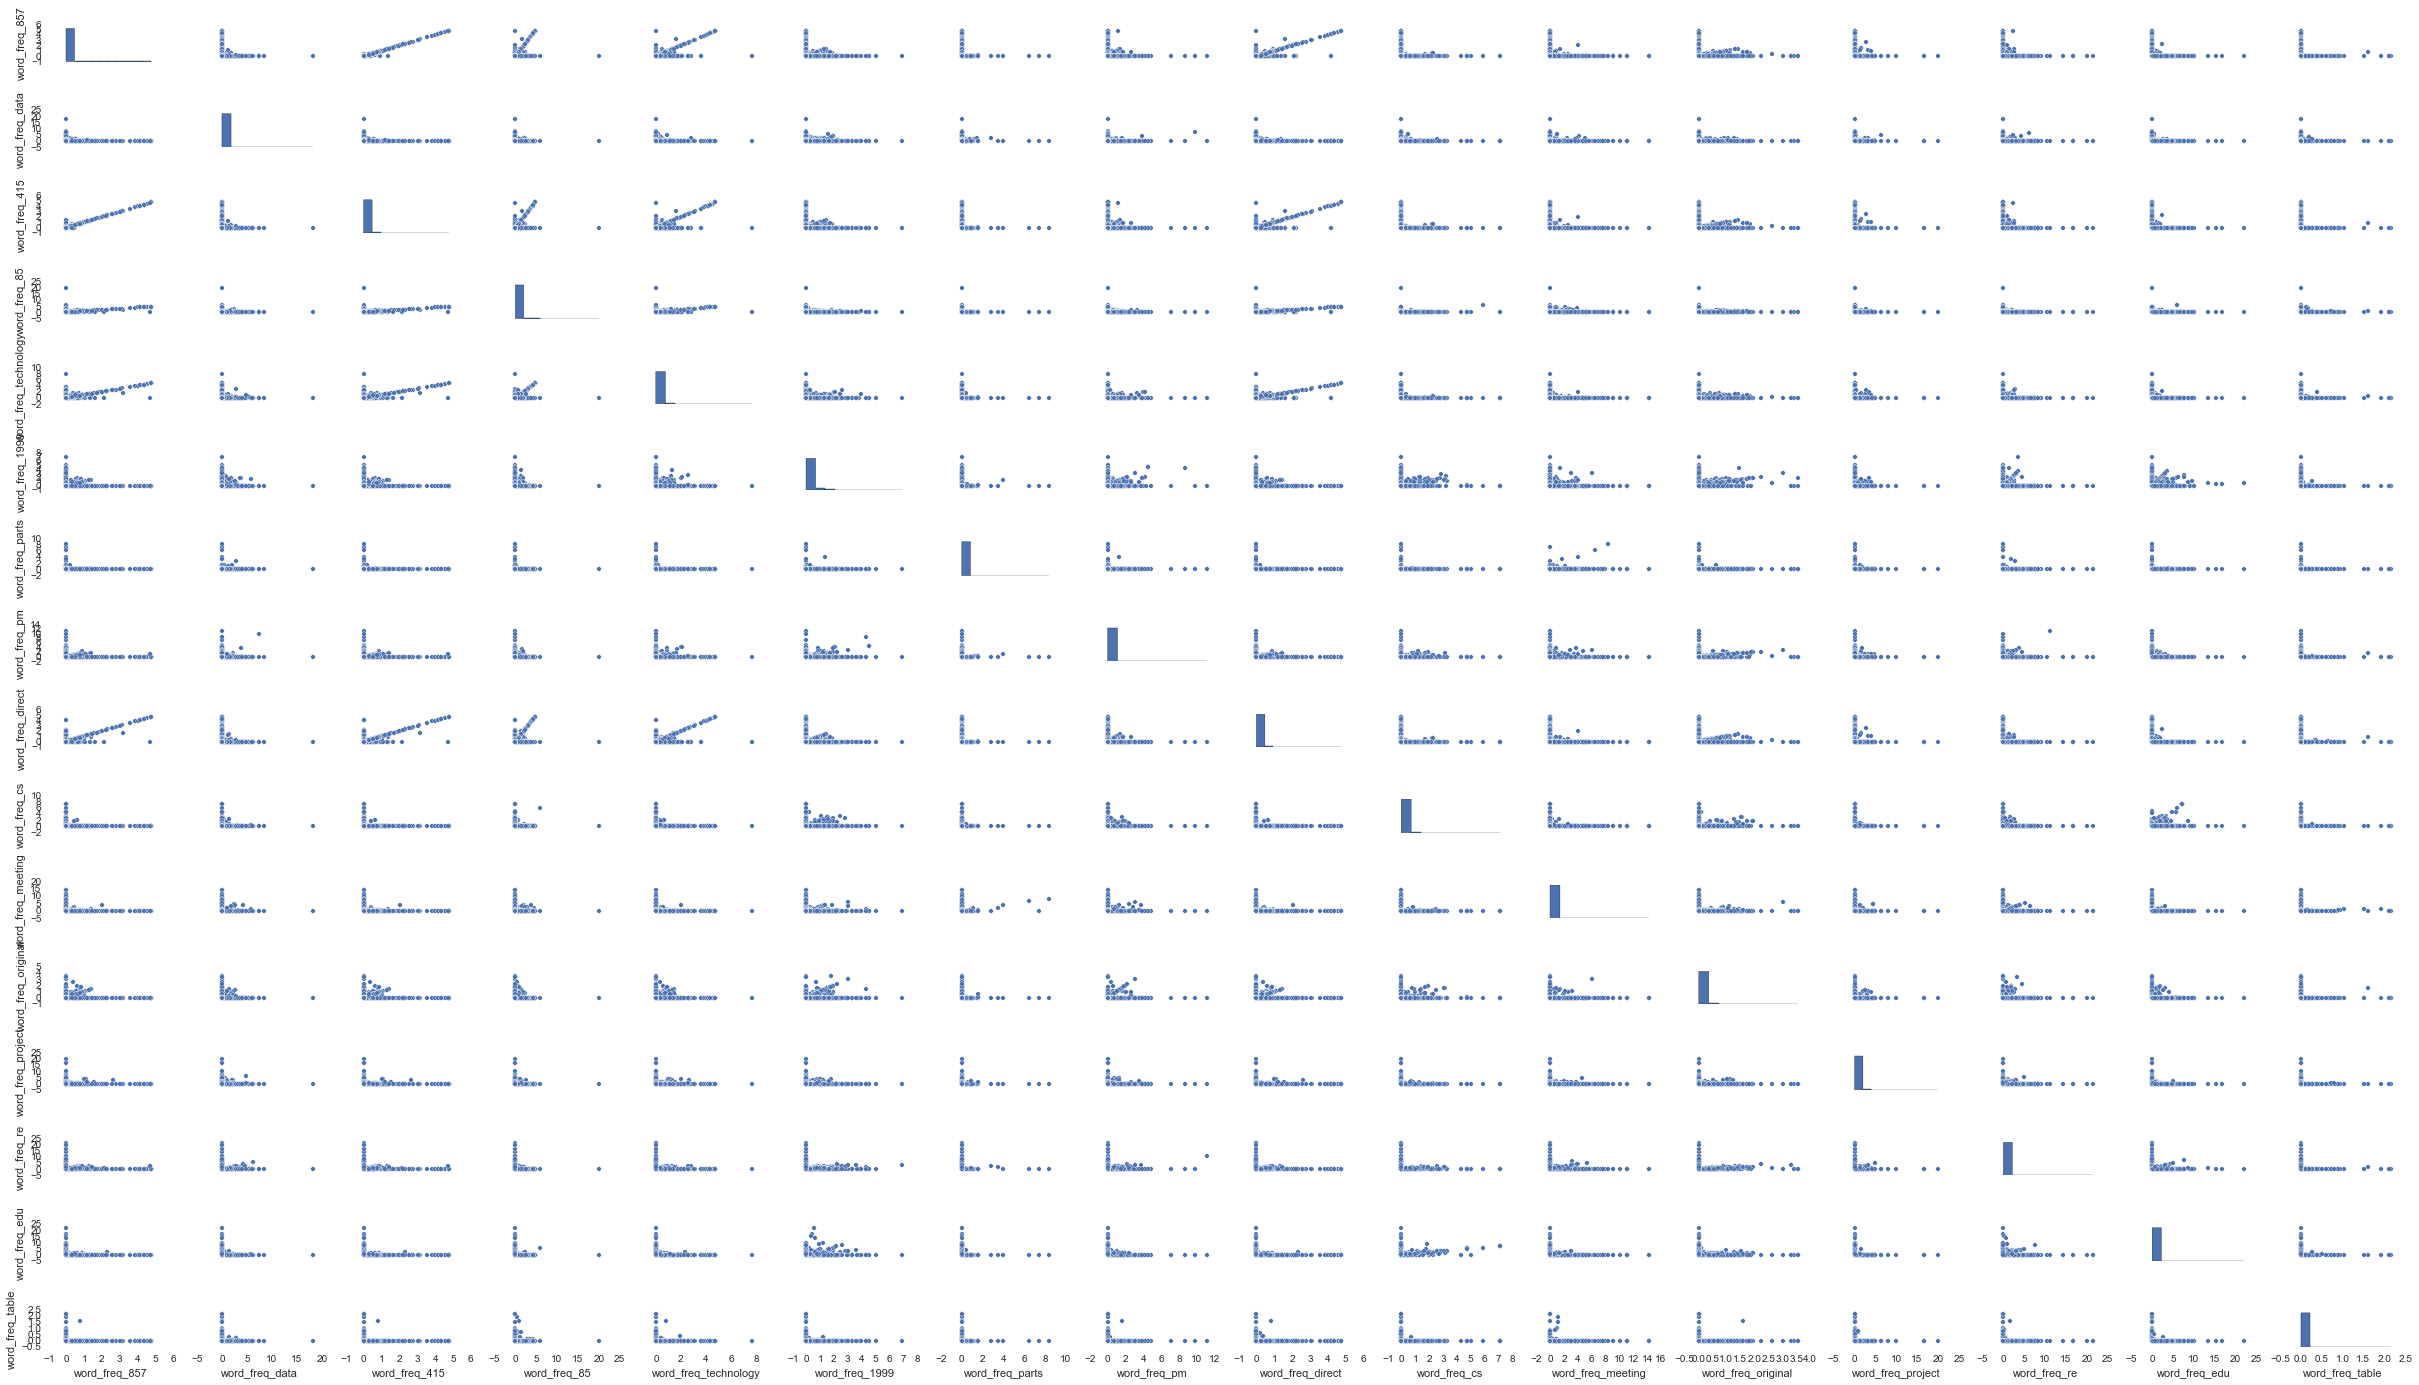

In [39]:
sns.pairplot(spam_data.ix[:,31:47], size = 1.2, aspect=1.75)

Attribute 'word_freq_857' seems to show some sort of linearity with 'word_freq_technology', 'word_freq_direct' and 'word_freq_415'. Bunch of linear variables in there but a lot of them seem to be orthogonal.

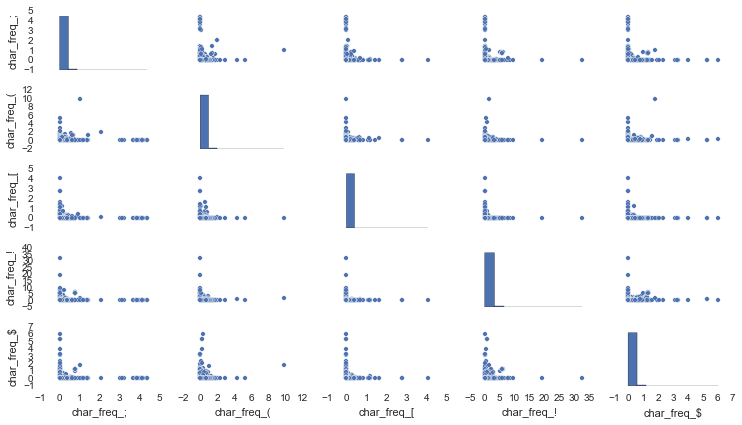

In [38]:
sns.pairplot(spam_data.ix[:,48:53], size = 1.2, aspect=1.75)

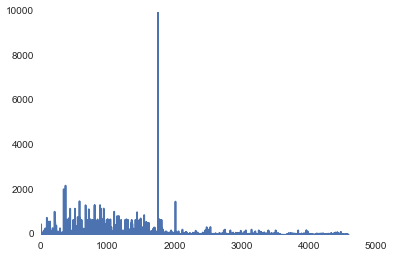

In [66]:
sns.plt.plot(spam_data['capital_run_length_longest'])

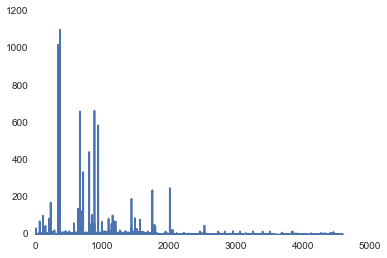

In [62]:
sns.plt.plot(spam_data['capital_run_length_average'])

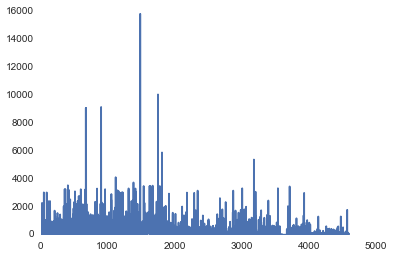

In [67]:
sns.plt.plot(spam_data['capital_run_length_total'])

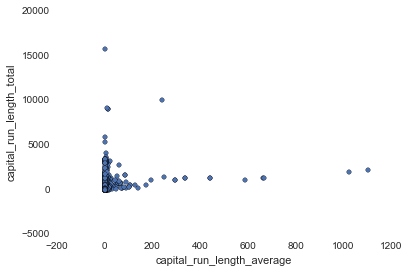

In [101]:
spam_data.plot(x='capital_run_length_average', y='capital_run_length_total', kind='scatter')

(array([ 2788.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1813.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

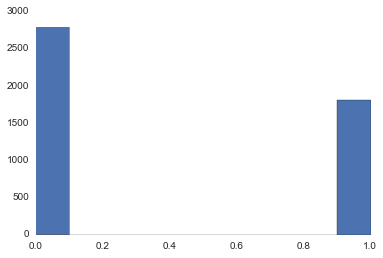

In [102]:
sns.plt.hist(spam_data['is_spam'])

More valid emails than Spams.

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [3]:
y_spam_data = spam_data['is_spam']
x_spam_data = spam_data['capital_run_length_longest']

In [4]:
import statsmodels.formula.api as smf
lgt = smf.logit('is_spam ~ capital_run_length_longest + capital_run_length_average + capital_run_length_total', spam_data)
logit_fit = lgt.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.560131
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4597
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.1646
Time:                        00:15:31   Log-Likelihood:                -2577.2
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                6.638e-220
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.4366      0.061    -23.569      0.000        -1.556    -1.317
capital_run_length_longest     0.0198      0.002     12.203      0.000         0.017     0.023
capital_run_length_average     0.1073      0.023      4.731      0.000         0.063     0.152
capital_run_length_total    8.577e-05   7.97e-05      1.076      0.282     -7.05e-05     0.000
==============================================================================================
"""

In [5]:
lgt = smf.logit('is_spam ~ capital_run_length_longest', spam_data)
logit_fit = lgt.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4599
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.1604
Time:                        00:15:31   Log-Likelihood:                -2590.2
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                3.003e-217
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -1.2531      0.046    -27.416      0.000        -1.343    -1.163
capital_run_length_longest     0.0252      0.001     21.189      0.000         0.023     0.028
==============================================================================================
"""

It looks like capital_run_length_longest is a significant attribute to predict if an email is spam or not. It contributes 2.5% to the likelihood that the email is spam.

In [6]:
logit_fit.params.map(np.exp)

Intercept                     0.285631
capital_run_length_longest    1.025544
dtype: float64

Count of Spams Predicted by Model 992
Count of Spams in our Actual Results 1813


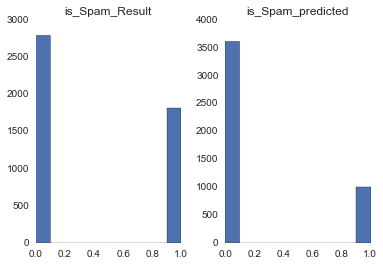

In [7]:
predict_data = pd.DataFrame()
predict_data['is_Spam_Prob'] = logit_fit.predict(spam_data)
predict_data['is_Spam_predicted'] = np.nan
#Taking a 50% Threshold for predictions
predict_data.ix[predict_data['is_Spam_Prob'] >0.50,'is_Spam_predicted'] = 1
predict_data.ix[predict_data['is_Spam_Prob'] <=0.50,'is_Spam_predicted'] = 0
#Actual Result from orginal DataSet
predict_data['is_Spam_Result'] = spam_data['is_spam']
predict_data[['is_Spam_predicted','is_Spam_Result']].hist()
print "Count of Spams Predicted by Model %d" % predict_data[predict_data['is_Spam_predicted'] == 1]['is_Spam_predicted'].count()
print "Count of Spams in our Actual Results %d" % predict_data[predict_data['is_Spam_Result'] == 1]['is_Spam_Result'].count()

In [8]:
from sklearn import metrics
metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted'])

0.72549445772658117

As seen in the two histograms, keeping a 50% threshold on the probability of being spam, we see that our model predicts a lot lesser less than what is in our actual result spam data set. The accuracy is about 72.5%

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [9]:
y_spam_data = spam_data['is_spam']
x_spam_data = spam_data.ix[:,:-1]

In [10]:
from sklearn.cross_validation import train_test_split, cross_val_score
# Create the training (and test) set using scikit-learn's train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x_spam_data, y_spam_data, test_size=0.3, random_state=12)

In [11]:
df_x_train = pd.DataFrame(x_train,columns = spam_data.ix[:,:-1].columns)
df_x_test = pd.DataFrame(x_test,columns = spam_data.ix[:,:-1].columns)
df_y_train = pd.DataFrame(y_train,columns = spam_data.ix[:,-1:].columns)
df_y_test = pd.DataFrame(y_test,columns = spam_data.ix[:,-1:].columns)
#df_x_train.head()
#df_x_test.head()
#df_y_train.head()
#df_y_test.head()

In [12]:
import statsmodels.formula.api as smf
import statsmodels as sm
#Adding Constant to the Training datasets
df_x_train = sm.tools.add_constant(df_x_train)
lgt = smf.Logit(df_y_train, df_x_train)
logit_fit = lgt.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.190788
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 3220
Model:                          Logit   Df Residuals:                     3162
Method:                           MLE   Df Model:                           57
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.7165
Time:                        00:15:34   Log-Likelihood:                -614.34
converged:                       True   LL-Null:                       -2166.7
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                         -1.5566      0.166     -9.405      0.000        -1.881    -1.232
word_freq_make                -0.6255      0.303     -2.061      0.039        -1.220    -0.031
word_freq_address             -0.1459      0.084     -1.743      0.081        -0.310     0.018
word_freq_all                  0.0463      0.135      0.343      0.731        -0.218     0.310
word_freq_3d                   2.2257      1.425      1.562      0.118        -0.567     5.018
word_freq_our                  0.8299      0.137      6.073      0.000         0.562     1.098
word_freq_over                 0.8255      0.289      2.856      0.004         0.259     1.392
word_freq_remove               1.9842      0.359      5.534      0.000         1.281     2.687
word_freq_internet             0.3592      0.183      1.962      0.050         0.000     0.718
word_freq_order                0.5133      0.337      1.523      0.128        -0.147     1.174
word_freq_mail                 0.4334      0.119      3.645      0.000         0.200     0.666
word_freq_receive             -0.0453      0.359     -0.126      0.899        -0.748     0.658
word_freq_will                -0.2321      0.093     -2.508      0.012        -0.414    -0.051
word_freq_people              -0.0734      0.282     -0.261      0.794        -0.626     0.479
word_freq_report               0.2479      0.220      1.125      0.261        -0.184     0.680
word_freq_addresses            0.6241      0.713      0.875      0.382        -0.774     2.022
word_freq_free                 0.9137      0.171      5.341      0.000         0.578     1.249
word_freq_business             0.8947      0.283      3.165      0.002         0.341     1.449
word_freq_email                0.1035      0.131      0.790      0.430        -0.153     0.360
word_freq_you                  0.0814      0.043      1.887      0.059        -0.003     0.166
word_freq_credit               0.6470      0.480      1.348      0.178        -0.293     1.587
word_freq_your                 0.3093      0.067      4.645      0.000         0.179     0.440
word_freq_font                 0.3235      0.263      1.229      0.219        -0.192     0.839
word_freq_000                  2.2841      0.573      3.989      0.000         1.162     3.406
word_freq_money                0.2173      0.153      1.424      0.155        -0.082     0.517
word_freq_hp                  -2.5164      0.489     -5.142      0.000        -3.476    -1.557
word_freq_hpl                 -0.8394      0.576     -1.458      0.145        -1.968     0.289
word_freq_george             -10.6203      2.226     -4.772      0.000       -14.982    -6.258
word_freq_650                  0.3411      0.225      1.517      0.129        -0.100     0.782
word_freq_lab                 -6.1339      4.473     -1.371      0.170       -14.901     2.633
word_freq_labs                -0.8009      0.521     -1.538      0.124        -1.821     0.220
word_freq_t

In [13]:
logit_fit.params[logit_fit.pvalues<=0.05]

const                         -1.556632
word_freq_make                -0.625514
word_freq_our                  0.829878
word_freq_over                 0.825522
word_freq_remove               1.984173
word_freq_internet             0.359161
word_freq_mail                 0.433432
word_freq_will                -0.232134
word_freq_free                 0.913700
word_freq_business             0.894665
word_freq_your                 0.309281
word_freq_000                  2.284059
word_freq_hp                  -2.516369
word_freq_george             -10.620345
word_freq_technology           0.975820
word_freq_meeting             -3.401502
word_freq_project             -1.648482
word_freq_re                  -0.859383
word_freq_edu                 -2.064683
word_freq_conference          -4.660969
char_freq_;                   -1.729665
char_freq_!                    0.248188
char_freq_$                    6.624647
char_freq_#                    3.023377
capital_run_length_longest     0.007779


Significant variables affecting the probability of being spam are above and their odds ratios are below.

In [14]:
logit_fit.params[logit_fit.pvalues<=0.05].map(np.exp)

const                           0.210845
word_freq_make                  0.534986
word_freq_our                   2.293040
word_freq_over                  2.283072
word_freq_remove                7.273031
word_freq_internet              1.432127
word_freq_mail                  1.542543
word_freq_will                  0.792840
word_freq_free                  2.493531
word_freq_business              2.446516
word_freq_your                  1.362445
word_freq_000                   9.816445
word_freq_hp                    0.080752
word_freq_george                0.000024
word_freq_technology            2.653342
word_freq_meeting               0.033323
word_freq_project               0.192342
word_freq_re                    0.423423
word_freq_edu                   0.126858
word_freq_conference            0.009457
char_freq_;                     0.177344
char_freq_!                     1.281701
char_freq_$                   753.437948
char_freq_#                    20.560606
capital_run_leng

Count of Spams Predicted by Model 514
Count of Spams in our Actual Results 526


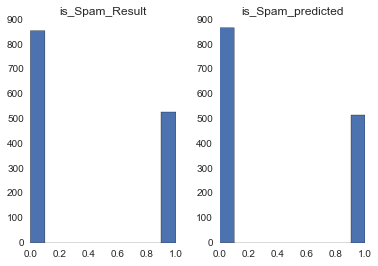

In [15]:
predict_data = pd.DataFrame()
#Adding Constant to the Training datasets
df_x_test = sm.tools.add_constant(df_x_test)
predict_data['is_Spam_Prob'] = logit_fit.predict(df_x_test)
predict_data['is_Spam_predicted'] = np.nan
#Taking a 50% Threshold for predictions
predict_data.ix[predict_data['is_Spam_Prob'] >0.50,'is_Spam_predicted'] = 1
predict_data.ix[predict_data['is_Spam_Prob'] <=0.50,'is_Spam_predicted'] = 0
#Actual Result from orginal DataSet
predict_data['is_Spam_Result'] = df_y_test['is_spam']
predict_data[['is_Spam_predicted','is_Spam_Result']].hist()
print "Count of Spams Predicted by Model %d" % predict_data[predict_data['is_Spam_predicted'] == 1]['is_Spam_predicted'].count()
print "Count of Spams in our Actual Results %d" % predict_data[predict_data['is_Spam_Result'] == 1]['is_Spam_Result'].count()

In [16]:
metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted'])

0.92614047791455467

As seen in the two histograms, keeping a 50% threshold on the probability of email being spam, with all our variables be kept, we see that our model predicts a lot better with respect to the actual spam email results. The accuracy in this case is close to 92.6%.

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [17]:
y_spam_data = spam_data['is_spam']
x_spam_data = spam_data.ix[:,:-1]
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
# Create the training (and test) set using scikit-learn's train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x_spam_data, y_spam_data, test_size=0.3, random_state=12)

In [18]:
df_x_train = pd.DataFrame(x_train,columns = spam_data.ix[:,:-1].columns)
df_x_test = pd.DataFrame(x_test,columns = spam_data.ix[:,:-1].columns)
df_y_train = pd.DataFrame(y_train,columns = spam_data.ix[:,-1:].columns)
df_y_test = pd.DataFrame(y_test,columns = spam_data.ix[:,-1:].columns)

In [19]:
# Using a logistic regression model from scikit learn to fit with X and y
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(x_train, y_train)

# Checking the accuracy on the training set
logistic_model.score(x_train, y_train)

0.92763975155279499

In [20]:
# Check the accuracy on the test set
logistic_model.score(x_test, y_test)

0.93193338160753081

In [21]:
# Checking mean accuracy with Cross Validation on the test set using 30 Fold Cross Validation
scores = cross_val_score(logistic_model, x_test, y_test, cv=30)
print scores
print "Mean Accuracy on the test data set using Logistic Regression = %0.2f" % (scores.mean()*100)

[ 0.95744681  0.80851064  0.93617021  0.95744681  0.93617021  0.87234043
  0.9787234   0.95744681  0.87234043  0.9787234   0.9787234   0.89361702
  0.93617021  0.91489362  0.82978723  0.91304348  0.91111111  0.93333333
  0.93333333  0.91111111  0.86666667  0.93333333  0.88888889  0.95555556
  0.88888889  0.86666667  0.97777778  0.97777778  0.93333333  0.93333333]
Mean Accuracy on the test data set using Logistic Regression = 92.11


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [22]:
from sklearn import neighbors, datasets, feature_selection
#Setting neighbors = 3
n = 3
knn_clf = neighbors.KNeighborsClassifier(n)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [23]:
print "Accuracy on the training data set using KNN = %0.2f" % (knn_clf.score(x_train, y_train)*100)
print "Accuracy on the test data set using KNN = %0.2f" % (knn_clf.score(x_test, y_test)*100)

Accuracy on the training data set using KNN = 90.00
Accuracy on the test data set using KNN = 78.28


The Logistic Regression is more accurate compared to KNN classification

In [24]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
n_neighbors = range(1, 51, 2)
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))

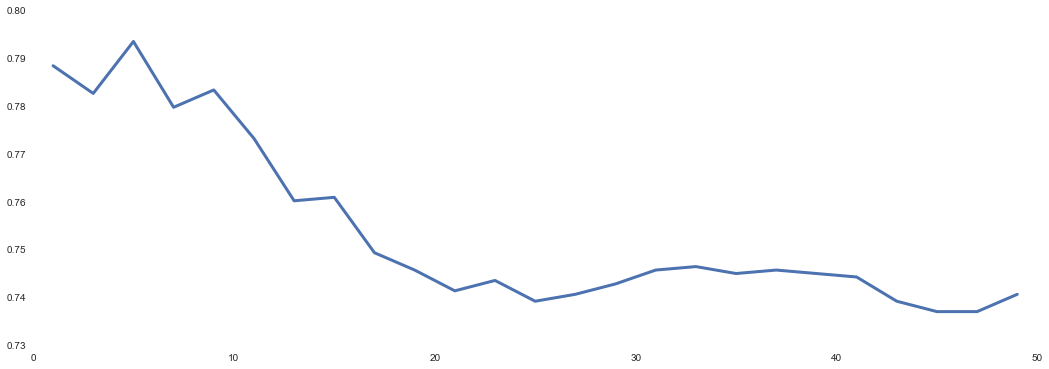

In [25]:
plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

As we can see from the above graph, the accuracy increase is the maximum when n = 5

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [26]:
# Using the Logistic Regression Model, the most significant features in the data set are as follows
logit_fit.params[logit_fit.pvalues<=0.05]

const                         -1.556632
word_freq_make                -0.625514
word_freq_our                  0.829878
word_freq_over                 0.825522
word_freq_remove               1.984173
word_freq_internet             0.359161
word_freq_mail                 0.433432
word_freq_will                -0.232134
word_freq_free                 0.913700
word_freq_business             0.894665
word_freq_your                 0.309281
word_freq_000                  2.284059
word_freq_hp                  -2.516369
word_freq_george             -10.620345
word_freq_technology           0.975820
word_freq_meeting             -3.401502
word_freq_project             -1.648482
word_freq_re                  -0.859383
word_freq_edu                 -2.064683
word_freq_conference          -4.660969
char_freq_;                   -1.729665
char_freq_!                    0.248188
char_freq_$                    6.624647
char_freq_#                    3.023377
capital_run_length_longest     0.007779


In [27]:
# Corresponding Odds Ratio
logit_fit.params[logit_fit.pvalues<=0.05].map(np.exp)

const                           0.210845
word_freq_make                  0.534986
word_freq_our                   2.293040
word_freq_over                  2.283072
word_freq_remove                7.273031
word_freq_internet              1.432127
word_freq_mail                  1.542543
word_freq_will                  0.792840
word_freq_free                  2.493531
word_freq_business              2.446516
word_freq_your                  1.362445
word_freq_000                   9.816445
word_freq_hp                    0.080752
word_freq_george                0.000024
word_freq_technology            2.653342
word_freq_meeting               0.033323
word_freq_project               0.192342
word_freq_re                    0.423423
word_freq_edu                   0.126858
word_freq_conference            0.009457
char_freq_;                     0.177344
char_freq_!                     1.281701
char_freq_$                   753.437948
char_freq_#                    20.560606
capital_run_leng

In [28]:
from sklearn.preprocessing import scale

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [29]:
# Check the accuracy on the test set
logistic_model.score(x_test, y_test)

0.93193338160753081

In [30]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted'])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.919502


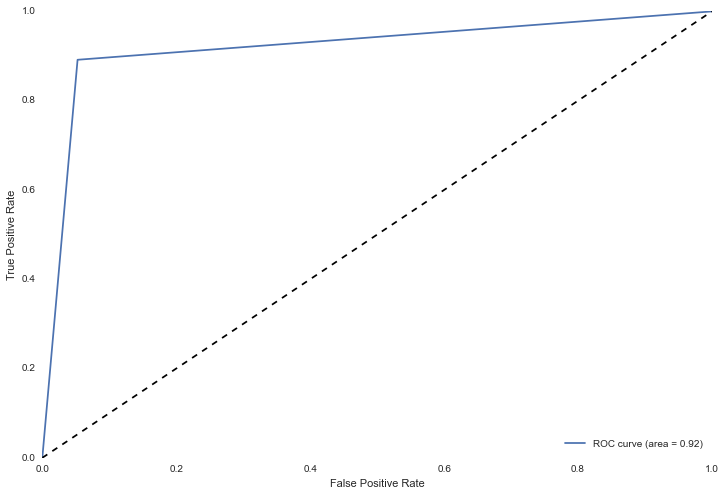

In [31]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [32]:
#With 50% Threshold our Accuracy is
metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted'])

0.92614047791455467

In [33]:
#Taking a 20% Threshold for predictions
predict_data['is_Spam_predicted_20'] = np.nan
predict_data.ix[predict_data['is_Spam_Prob'] >0.20,'is_Spam_predicted_20'] = 1
predict_data.ix[predict_data['is_Spam_Prob'] <=0.20,'is_Spam_predicted_20'] = 0

metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted_20'])

0.89210716871832008

In [34]:
#Taking a 40% Threshold for predctions
predict_data['is_Spam_predicted_40'] = np.nan
predict_data.ix[predict_data['is_Spam_Prob'] >0.40,'is_Spam_predicted_40'] = 1
predict_data.ix[predict_data['is_Spam_Prob'] <=0.40,'is_Spam_predicted_40'] = 0

metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted_40'])

0.92179580014482254

In [35]:
#Taking a 60% Threshold for predictions
predict_data['is_Spam_predicted_60'] = np.nan
predict_data.ix[predict_data['is_Spam_Prob'] >0.60,'is_Spam_predicted_60'] = 1
predict_data.ix[predict_data['is_Spam_Prob'] <=0.60,'is_Spam_predicted_60'] = 0

metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted_60'])

0.91889934829833453

In [36]:
#Taking a 80% Threshold for predictions
predict_data['is_Spam_predicted_80'] = np.nan
predict_data.ix[predict_data['is_Spam_Prob'] >0.80,'is_Spam_predicted_80'] = 1
predict_data.ix[predict_data['is_Spam_Prob'] <=0.80,'is_Spam_predicted_80'] = 0

metrics.accuracy_score(predict_data['is_Spam_Result'], predict_data['is_Spam_predicted_80'])

0.88631426502534394

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

When moving on either direction of the 50% threshold, we are not really seeing any increase in accuracy. So there is really is not much of an incentive to move the threshold.

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [37]:
y_spam_data = spam_data['is_spam']
x_spam_data = spam_data.ix[:,:-1]

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(x_spam_data)

PCA(copy=True, n_components=2, whiten=True)

In [39]:
pca.components_
pca.explained_variance_ratio_

array([ 0.92702701,  0.07104297])

In [40]:
pca.explained_variance_ratio_.sum()

0.99806998468921959

In [41]:
X_spam_data_pca = pca.transform(x_spam_data)

In [42]:
np.corrcoef(X_spam_data_pca.T)

array([[  1.00000000e+00,   4.69474009e-16],
       [  4.69474009e-16,   1.00000000e+00]])

In [43]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    print target_ids
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

[0, 1]


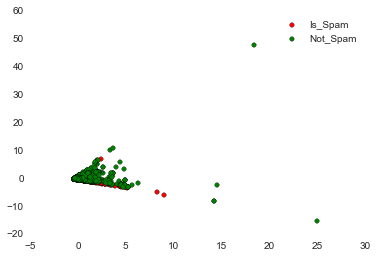

In [45]:
target_names = ['Is_Spam', 'Not_Spam']
plot_PCA_2D(X_spam_data_pca, y_spam_data.values, target_names)
#print X_spam_data_pca.shape, y_spam_data.shape